In [1]:
from process_helper import *
import numpy as np

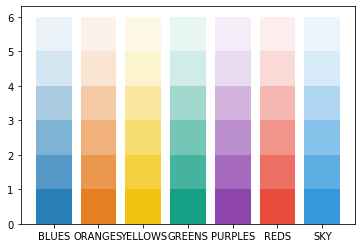

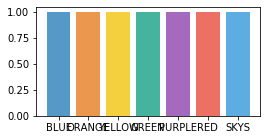

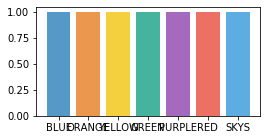

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
idxs = ["g_total_buf_sz", "read_perc_","zipf_theta_"]

In [8]:
exp = "exp_point_10g_fanout250"

In [9]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)
df["id"] = range(df.shape[0])

In [10]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'cc_time_ms', 'commit_cnt_', 'commit_latency_perc0_us',
       'commit_latency_perc50_us', 'commit_latency_perc99_us',
       'commit_queue_sz_', 'g_buf_entry_sz', 'g_buf_type', 'g_check_loaded',
       'g_commit_group_sz', 'g_commit_pool_sz', 'g_commit_queue_limit',
       'g_cpu_freq', 'g_early_lock_release', 'g_enable_group_commit',
       'g_enable_logging', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
       'g_save_output', 'g_total_buf_sz', 'g_warmup_finishe

In [11]:
# create pivot table
df1 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]]
])
pivot = df1.groupby(idxs)[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rd_time_ms", "remote_rds_", "commit_cnt_"
    ].max()
pivot

throughput_txn_per_sec  abort_cnt_  \
g_total_buf_sz read_perc_ zipf_theta_                                       
3000000000     0.5        0.3                         228.322        5991   
                          0.5                         289.070      240102   
                          0.7                         391.350    16816380   
                          0.9                         288.150    67230418   
               0.9        0.3                         230.278           0   
                          0.5                         286.852       26076   
                          0.7                         418.715     4075279   
                          0.9                         511.198    56263851   
               1.0        0.3                         226.338           0   
                          0.5                         283.888           0   
                          0.7                         419.247           0   
                          0.9                         895.549           0   
6000000000     0.5        0.3                         382.906        3180   
                          0.5                         397.358      153476   
                          0.7                         425.411     8322700   
                          0.9                         409.584    39126865   
               0.9        0.3                         395.778        5148   
                          0.5                         519.344       66563   
                          0.7                         805.150     5027198   
                          0.9                         953.604    45825098   
               1.0        0.3                         386.015           0   
                          0.5                         509.647           0   
                          0.7                         791.249           0   
                          0.9                        1752.690           0   
12000000000    0.5        0.3                         459.186           0   
                          0.5                         455.955         134   
                          0.7                         453.424        8881   
                          0.9                         429.489      410661   
               0.9        0.3                        2526.240          26   
                          0.5                        2624.300         285   
                          0.7                        2637.050       15586   
                          0.9                        2467.570      443444   
               1.0        0.3                        3486.900           0   
                          0.5                        3476.420           0   
                          0.7                        3504.150           0   
                          0.9                        3529.230           0   
15000000000    0.5        0.3                         414.058           0   
                          0.5                         440.461         147   
                          0.7                         462.760        9365   
                          0.9                         419.515      412212   
               0.9        0.3                        2456.810           6   
                          0.5                        2762.940         657   
                          0.7                        2607.140       14071   
                          0.9                        2580.580      465365   
               1.0        0.3                        3314.520           0   
                          0.5                        3367.220           0   
                          0.7                        3454.900           0   
                          0.9                        3574.650           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
g_total_buf_sz read_perc_ zipf_theta_                                          
3000000000     0.5        0.

In [12]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]]
])
pivot2 = df2.groupby(idxs)[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rd_time_ms", "remote_rds_", "commit_cnt_"
    ].max()
pivot2

throughput_txn_per_sec  abort_cnt_  \
g_total_buf_sz read_perc_ zipf_theta_                                       
3000000000     0.5        0.3                         95.8214        1898   
                          0.5                        108.7730      124915   
                          0.7                        137.4280     5907627   
                          0.9                         88.0580    20827655   
               0.9        0.3                         96.8712        3192   
                          0.5                        108.1600         681   
                          0.7                        144.3430     1290349   
                          0.9                        182.8070    16348829   
               1.0        0.3                         97.2887           0   
                          0.5                        109.9820           0   
                          0.7                        144.4770           0   
                          0.9                        284.0440           0   
6000000000     0.5        0.3                        139.9510        4076   
                          0.5                        162.8210       65908   
                          0.7                        215.6370     6279571   
                          0.9                        129.2020    19194201   
               0.9        0.3                        141.9630           0   
                          0.5                        164.5300        9286   
                          0.7                        222.5130     1464798   
                          0.9                        263.0930    16742834   
               1.0        0.3                        139.5020           0   
                          0.5                        160.2780           0   
                          0.7                        221.4570           0   
                          0.9                        451.1650           0   
12000000000    0.5        0.3                        402.6230        6433   
                          0.5                        413.4070       71812   
                          0.7                        401.2370     5255261   
                          0.9                        317.9770    20465903   
               0.9        0.3                        651.9670           0   
                          0.5                        604.6710       22595   
                          0.7                        687.2160     2987087   
                          0.9                        783.4030    17208989   
               1.0        0.3                        621.4580           0   
                          0.5                        583.0790           0   
                          0.7                        821.2150           0   
                          0.9                       1479.0000           0   
15000000000    0.5        0.3                        455.2270           4   
                          0.5                        444.9980         112   
                          0.7                        486.2830       11576   
                          0.9                        455.2040      499504   
               0.9        0.3                       2573.9400           2   
                          0.5                       2676.9200         121   
                          0.7                       2531.5100       11214   
                          0.9                       2377.5100      477110   
               1.0        0.3                       3320.3700           0   
                          0.5                       3598.1500           0   
                          0.7                       3417.9400           0   
                          0.9                       3402.9700           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
g_total_buf_sz read_perc_ zipf_theta_                                          
3000000000     0.5        0.

In [13]:
# create pivot table
df0 = pd.DataFrame().from_records([json.loads(line) for line in open(datadir + "different_settings/" + 
                                                                     "microbench_zipf_10g_fanout18.out")])
df3 = apply_mask(df0, [
    ["g_buf_type", ["eq", "NOBUF"]]
])
pivot3 = df3.groupby(idxs)[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_"
    ].max()
pivot3

throughput_txn_per_sec  abort_cnt_  \
g_total_buf_sz read_perc_ zipf_theta_                                       
0              0.5        0.3                        107.9680           1   
                          0.5                        107.6960          19   
                          0.7                        100.3890        2035   
                          0.9                         24.8514       28466   
               0.9        0.3                        137.1240           1   
                          0.5                        138.3340           4   
                          0.7                        135.9800         474   
                          0.9                         73.8007       18228   
               1.0        0.3                        136.8010           0   
                          0.5                        135.7420           0   
                          0.7                        138.0980           0   
                          0.9                        139.4890           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
g_total_buf_sz read_perc_ zipf_theta_                                          
0              0.5        0.3                0.0   242304            2.30334   
                          0.5                0.0   241722            2.32239   
                          0.7                0.0   240512            2.15242   
                          0.9                0.0   241918            1.07294   
               0.9        0.3                0.0   306938            2.52205   
                          0.5                0.0   309754            2.70728   
                          0.7                0.0   308001            2.78571   
                          0.9                0.0   308869            1.53366   
               1.0        0.3                0.0   306544            2.45228   
                          0.5                0.0   303968            2.44200   
                          0.7                0.0   308800            2.48494   
                          0.9                0.0   312112            2.57270   

                                       avg_sum_log_flush_latency (us)  \
g_total_buf_sz read_perc_ zipf_theta_                                   
0              0.5        0.3                                10292.60   
                          0.5                                10358.40   
                          0.7                                10205.40   
                          0.9                                 8807.13   
               0.9        0.3                                 8872.30   
                          0.5                                 9596.61   
                          0.7                                10093.60   
                          0.9                                 8340.49   
               1.0        0.3                                 8696.00   
                          0.5                                 8691.01   
                          0.7                                 8727.30   
                          0.9                                 8959.00   

                                       avg_log_latency_ (us)  \
g_total_buf_sz read_perc_ zipf_theta_                          
0              0.5        0.3                        16404.6   
                          0.5                        16451.9   
                          0.7                        16724.0   
                          0.9                        10736.5   
               0.9        0.3                        14070.2   
                          0.5                        15384.3   
                          0.7                        16535.7   
                          0.9                        13057.4   
               1.0        0.3                        13857.2   
                          0.5                        13734.0   
                          0.7                   

In [104]:
pivot.index.levels[read_col]

Float64Index([0.5, 0.9, 1.0], dtype='float64', name='read_perc_')

In [107]:
pivot.index.levels[workload_col]

Int64Index([3000000000, 6000000000, 12000000000, 15000000000], dtype='int64', name='g_total_buf_sz')

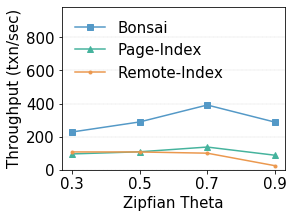

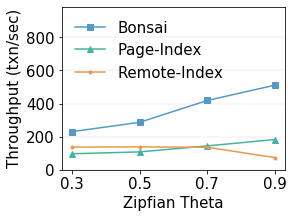

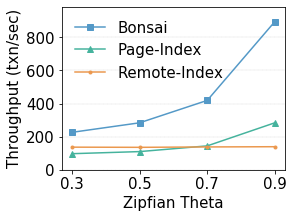

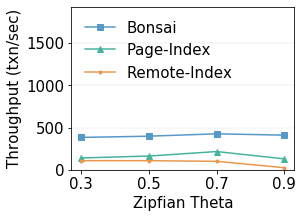

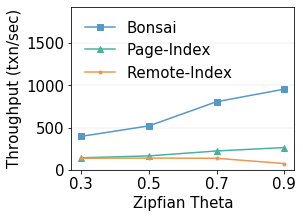

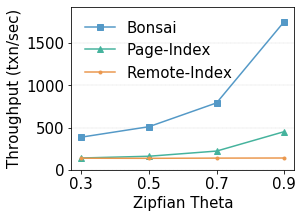

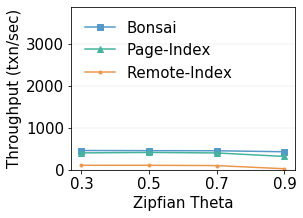

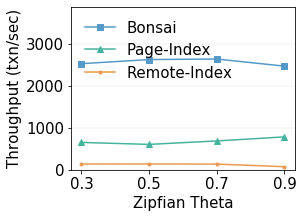

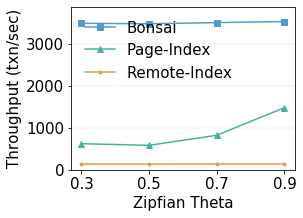

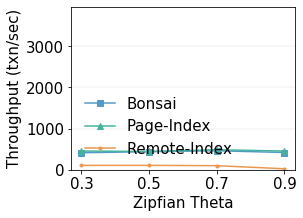

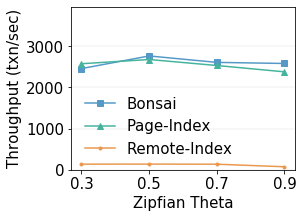

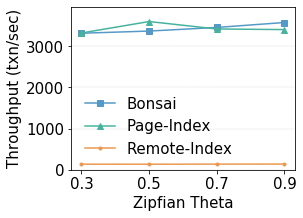

In [111]:
import matplotlib.ticker as mtick
def y_axis_formatter(x, pos):
    # Check if the value is in the thousands
    if x >= 1000:
        # Format as "1k" and divide by 1000
        return f"{int(x/1000)}k"
    else:
        return "%.1fk"%(x / 1000.0)
workload_col = 0
zipf_col = 2
read_col = 1
workload_ratio = [sz / 10240000000.0 for sz in pivot.index.levels[workload_col]]
workload_names = ["s", "m", "l", "xl"]
read_names = ["rw", "rm", "ro"]
zipf_names = ["zf%.f"%(z * 10) for z in pivot.index.levels[zipf_col]]
path = "/Users/scarlet/Desktop/Bonsai/figures/point_by_size/"
zipf_names
for i, x in enumerate(pivot.index.levels[workload_col]):
    plot_data = pivot.loc[x]
    plot_data2 = pivot2.loc[x]
    plot_data3 = pivot3.loc[0]
    max_throughput = max(plot_data["throughput_txn_per_sec"].max(), plot_data2["throughput_txn_per_sec"].max()) * 1.1 
    for j, y in enumerate(pivot.index.levels[read_col]):
        fig, ax = plt.subplots()
        # xval = range(len(pivot.index.levels[read_col]))
        xval = pivot.index.levels[zipf_col]
        ax.plot(xval, 
                plot_data.loc[y]["throughput_txn_per_sec"],
                color=line_colors["BLUE"],
                marker="s", label="Bonsai")
        ax.plot(xval, 
                plot_data2.loc[y]["throughput_txn_per_sec"],
                color=line_colors["GREEN"],
                marker="^", label="Page-Index")
        ax.plot(xval, 
                plot_data3.loc[y]["throughput_txn_per_sec"],
                color=line_colors["ORANGE"],
                marker=".", label="Remote-Index")
        ax.set_ylim(0, max_throughput)
        #ax.set_xlim(0, 1)
        ax.set_xticks(xval)
        location = "upper left"
        if i == 3:
            location = "lower left"
        ax.legend(loc=location, frameon=False)
        ax.set_ylabel("Throughput (txn/sec)")
        ax.set_xlabel("Zipfian Theta")
        #ax.yaxis.set_major_formatter(mtick.FuncFormatter(y_axis_formatter))
        ax.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
        fig.set_size_inches(4, 3)
        fig.savefig(path + "point_10g_fanout250_limit16k_{}_{}.pdf".format(
            workload_names[i], read_names[j]), bbox_inches="tight")    

In [ ]:
#(pivot2["remote_rds_"] / pivot2["commit_cnt_"]) / (pivot["remote_rds_"] / pivot["commit_cnt_"])

In [118]:
pivot.loc[3000000000].loc[1.0].loc[0.3]["remote_rd_time_ms"] / pivot.loc[3000000000].loc[1.0].loc[0.3]["remote_rds_"] 

3.7501154354852595

In [119]:
pivot2.loc[3000000000].loc[1.0].loc[0.3]["remote_rd_time_ms"] / pivot2.loc[3000000000].loc[1.0].loc[0.3]["remote_rds_"] 

5.3403957870347165

In [120]:
5.3403957870347165 / 3.7501154354852595

1.4240617066081533

In [17]:
pivot.loc[3000000000]["throughput_txn_per_sec"] / pivot3.loc[0]["throughput_txn_per_sec"]

read_perc_  zipf_theta_
0.5         0.3             2.114719
            0.5             2.684129
            0.7             3.898335
            0.9            11.594920
0.9         0.3             1.679341
            0.5             2.073619
            0.7             3.079240
            0.9             6.926736
1.0         0.3             1.654505
            0.5             2.091379
            0.7             3.035866
            0.9             6.420212
Name: throughput_txn_per_sec, dtype: float64

In [24]:
pivot.loc[3000000000]["throughput_txn_per_sec"] / pivot2.loc[3000000000]["throughput_txn_per_sec"]

read_perc_  zipf_theta_
0.5         0.3            2.382787
            0.5            2.657553
            0.7            2.847673
            0.9            3.272275
0.9         0.3            2.377156
            0.5            2.652108
            0.7            2.900833
            0.9            2.796381
1.0         0.3            2.326457
            0.5            2.581222
            0.7            2.901825
            0.9            3.152853
Name: throughput_txn_per_sec, dtype: float64

In [25]:
pivot.loc[6000000000]["throughput_txn_per_sec"] / pivot2.loc[6000000000]["throughput_txn_per_sec"]

read_perc_  zipf_theta_
0.5         0.3            2.736000
            0.5            2.440459
            0.7            1.972811
            0.9            3.170106
0.9         0.3            2.787895
            0.5            3.156531
            0.7            3.618440
            0.9            3.624589
1.0         0.3            2.767093
            0.5            3.179769
            0.7            3.572924
            0.9            3.884809
Name: throughput_txn_per_sec, dtype: float64

In [26]:
pivot.loc[15000000000]["throughput_txn_per_sec"] / pivot2.loc[15000000000]["throughput_txn_per_sec"]

read_perc_  zipf_theta_
0.5         0.3            0.909564
            0.5            0.989804
            0.7            0.951627
            0.9            0.921598
0.9         0.3            0.954494
            0.5            1.032134
            0.7            1.029875
            0.9            1.085413
1.0         0.3            0.998238
            0.5            0.935820
            0.7            1.010814
            0.9            1.050450
Name: throughput_txn_per_sec, dtype: float64

In [28]:
(pivot.loc[6000000000]["throughput_txn_per_sec"] / pivot2.loc[6000000000]["throughput_txn_per_sec"]).min()

1.9728107885010457

In [29]:
(pivot.loc[6000000000]["throughput_txn_per_sec"] / pivot2.loc[6000000000]["throughput_txn_per_sec"]).max()

3.884809326964636